# sklearn
This is a machine learning library.

## Setup (hidden)

In [616]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## The Library
sklearn **does not automatically import its subpackages**. Therefore all subpakcages must be specifically loaded before use.

In [617]:
# Model Selection
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

# Preprocessing
from sklearn.preprocessing   import Imputer
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import Normalizer
from sklearn.preprocessing   import PolynomialFeatures

# Model and Pipeline
from sklearn.linear_model    import LinearRegression
from sklearn.pipeline        import make_pipeline

# Measurement
from sklearn.metrics         import *

import statsmodels.formula.api as smf

## Data Splitting

### One Time Split

#### Sample Data
Generate 100 rows of data, with 3x features (X1,X2,X3), and one dependant variable (Y)

In [618]:
n = 21  # number of samples
I = 5  # intercept value
E = np.random.randint( 1,20, n)  # Error
x1 = np.random.randint( 1,n+1, n)
x2 = np.random.randint( 1,n+1, n)
x3 = np.random.randint( 1,n+1, n)
y = 0.1*x1 + 0.2*x2 + 0.3*x3 + E + I
mydf = pd.DataFrame({
    'y':y,
    'x1':x1,
    'x2':x2,
    'x3':x3
})
mydf.shape

(21, 4)

In [619]:
mydf.head()

   x1  x2  x3     y
0   8  18  16  16.2
1  14   9  14  17.4
2   8   1  12  27.6
3  17   7   2  11.7
4  12  18  15  20.3

#### Method 1: Split One Dataframe Into Two (Train & Test)

```
traindf, testdf = train_test_split( df, test_size=, random_state= ) 
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

In [620]:
traindf, testdf = train_test_split(mydf,test_size=0.2, random_state=25)

In [621]:
print (len(traindf))
print (len(testdf))

16
5


#### Method 2: DataFrame in X,Y, split into x_train/test, y_train/test
```
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=, random_state= )
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

**Split DataFrame into X and Y First**

In [622]:
feature_cols = ['x1','x2','x3']
X = mydf[feature_cols]
Y = mydf.y

**Then Split X/Y into x_train/test, y_train/test**

In [623]:
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=25)
print (len(x_train))
print (len(x_test))

16
5


### K-Fold
```
KFold(n_splits=3, shuffle=False, random_state=None)
```

**suffle=False** (default)

In [624]:
kf = KFold(n_splits=7)

In [625]:
for train_index, test_index in kf.split(X):
  print (train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19 20] [12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 18 19 20] [15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20]


**suffle=True**

In [626]:
kf = KFold(n_splits=7, shuffle=True)

In [627]:
for train_index, test_index in kf.split(X):
  print (train_index, test_index)

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 20] [ 1 17 18]
[ 0  1  2  3  4  5  6  7 11 12 13 14 15 16 17 18 19 20] [ 8  9 10]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 16 17 18 19 20] [ 5 14 15]
[ 0  1  2  4  5  6  7  8  9 10 11 12 14 15 17 18 19 20] [ 3 13 16]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 20] [ 6  7 19]
[ 0  1  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 2 12 20]
[ 1  2  3  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20] [ 0  4 11]


### Leave One Out

- For a dataset of N rows, Leave One Out will split N-1 times, each time leaving one row as test, remaning as training set.  
- Due to the **high number of test sets** (which is the same as the number of samples) this cross-validation method can be very costly. For large datasets one should favor KFold.

In [633]:
loo = LeaveOneOut()

In [632]:
for train_index, test_index in loo.split(X):
  print (train_index, test_index)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20] [14]
[ 0  

In [630]:
X

    x1  x2  x3
0    8  18  16
1   14   9  14
2    8   1  12
3   17   7   2
4   12  18  15
..  ..  ..  ..
16   6  16  15
17  21   5  19
18   1  10   4
19   1  13  18
20   7  18  10

[21 rows x 3 columns]

## Polynomial Transform
This can be used as part of feature engineering, to introduce new features for data that seems to fit with quadradic model.

### Single Variable

#### Sample Data
Data must be 2-D before polynomial features can be applied. Code below convert 1D array into 2D array.

In [468]:
x = np.array([1, 2, 3, 4, 5])
X = x[:,np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

#### Degree 1
One Degree means maintain original features. No new features is created.

In [469]:
PolynomialFeatures(degree=1, include_bias=False).fit_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.]])

#### Degree 2
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  

In [470]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.]])

#### Degree 3
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  
Degree-3 additional features:  x^3

In [471]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

#### Degree 4
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  
Degree-3 additional features:  x^3  
Degree-3 additional features:  x^4

In [472]:
PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.,    1.],
       [   2.,    4.,    8.,   16.],
       [   3.,    9.,   27.,   81.],
       [   4.,   16.,   64.,  256.],
       [   5.,   25.,  125.,  625.]])

### Two Variables

#### Sample Data

In [473]:
X = pd.DataFrame( {'x1': [1, 2, 3, 4, 5 ],
                   'x2': [6, 7, 8, 9, 10]})
X

   x1  x2
0   1   6
1   2   7
2   3   8
3   4   9
4   5  10

#### Degree 2
```
Degree-1 original   features:  x1,     x2  
Degree-2 additional features:  x1^2,   x2^2,   x1:x2 
```

In [474]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[   1.,    6.,    1.,    6.,   36.],
       [   2.,    7.,    4.,   14.,   49.],
       [   3.,    8.,    9.,   24.,   64.],
       [   4.,    9.,   16.,   36.,   81.],
       [   5.,   10.,   25.,   50.,  100.]])

#### Degree 3
```
Degree-1 original   features:  x1,       x2  
Degree-2 additional features:  x1^2,     x2^2,   x1:x2 
Degree-3 additional features:  x1^3,     x2^3    x1:x2^2    x2:x1^2
```

In [475]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[    1.,     6.,     1.,     6.,    36.,     1.,     6.,    36.,
          216.],
       [    2.,     7.,     4.,    14.,    49.,     8.,    28.,    98.,
          343.],
       [    3.,     8.,     9.,    24.,    64.,    27.,    72.,   192.,
          512.],
       [    4.,     9.,    16.,    36.,    81.,    64.,   144.,   324.,
          729.],
       [    5.,    10.,    25.,    50.,   100.,   125.,   250.,   500.,
         1000.]])

## Imputation of Missing Data

### Sample Data

In [476]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [477]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

## Scaling

It is possible that some insignificant variable with larger range will be dominating the objective function.  
We can remove this problem by scaling down all the features to a same range.

### Sample Data

In [478]:
X=mydf.filter(like='x')[:5]
X

   x1  x2  x3
0   6  45  29
1  84  40  30
2  29  97  27
3  63  47  56
4  92  10  60

### MinMax Scaler

```
MinMaxScaler( feature_range(0,1), copy=True )
# default feature range (output result) from 0 to 1
# default return a copy of new array, copy=False will inplace original array
```

**Define Scaler Object**

In [479]:
scaler = MinMaxScaler()

**Transform Data**

In [480]:
scaler.fit_transform(X)

array([[ 0.        ,  0.40229885,  0.06060606],
       [ 0.90697674,  0.34482759,  0.09090909],
       [ 0.26744186,  1.        ,  0.        ],
       [ 0.6627907 ,  0.42528736,  0.87878788],
       [ 1.        ,  0.        ,  1.        ]])

**Scaler Attributes**  
```
data_min_: minimum value of the feature (before scaling)  
data_max_: maximum value of the feature (before scaling)  
```

In [481]:
pd.DataFrame(list(zip(scaler.data_min_, scaler.data_max_)), 
             columns=['data_min','data_max'], 
             index=X.columns)

    data_min  data_max
x1       6.0      92.0
x2      10.0      97.0
x3      27.0      60.0

### Standard Scaler

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

```
StandardScaler(copy=True, with_mean=True, with_std=True)
# copy=True : return a copy of data, instead of inplace
# with_mean=True : centre all features by substracting with its mean
# with_std=True  : centre all features by dividing with its std
```

**Define Scaler Object**

In [482]:
scaler = StandardScaler()

**Transform Data**

In [483]:
scaler.fit_transform(X)

array([[-1.491748  , -0.10001531, -0.78847904],
       [ 0.89260331, -0.27861408, -0.71931421],
       [-0.78867005,  1.75741187, -0.9268087 ],
       [ 0.25066257, -0.0285758 ,  1.07897132],
       [ 1.13715217, -1.35020668,  1.35563063]])

**Scaler Attributes**  
After the data transformation step above, scaler will have the mean and variance information for each feature.

In [484]:
pd.DataFrame(list(zip(scaler.mean_, scaler.var_)), 
             columns=['mean','variance'], 
             index=X.columns)

    mean  variance
x1  54.8   1070.16
x2  47.8    783.76
x3  40.4    209.04

## Pipeline

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

- **Impute** missing values using the mean  
- **Transform** features to quadratic  
- **Fit** a linear regression  

**make_pipeline** takes list of functions as parameters. When calling **fit()** on a pipeline object, these functions will be performed in sequential with data flow from one function to another.

```
make_pipeline (
    function_1 (),
    function_2 (),
    function_3 ()
 )
```

### Sample Data

In [485]:
(X,y)

(   x1  x2  x3
 0   6  45  29
 1  84  40  30
 2  29  97  27
 3  63  47  56
 4  92  10  60, array([14, 16, -1,  8, -5]))

### Create Pipeline

In [486]:
my_model = make_pipeline (
    Imputer            (strategy='mean'),
    PolynomialFeatures (degree=2),
    LinearRegression   ()
)
type(my_model)

sklearn.pipeline.Pipeline

### Executing Pipeline

In [487]:
my_model.fit( X, y) # execute the pipeline
print (y)
print (my_model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


## Cross Validation

### Sample Data

In [568]:
X = np.arange(21).reshape(7,3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

### K-Fold
```
KFold(n_splits=3, shuffle=False, random_state=None)
```

In [573]:
kf = KFold(n_splits=7)

In [571]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [574]:
for train_index, test_index in kf.split(X):
 print (train_index, test_index)

[1 2 3 4 5 6] [0]
[0 2 3 4 5 6] [1]
[0 1 3 4 5 6] [2]
[0 1 2 4 5 6] [3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


### Leave One Out

# Linear Regression

## The Library

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics        import mean_absolute_error, mean_squared_error
import statsmodels.api   as sm

## The Math

## Sample Data

### Data Emulation

In [489]:
n = 200  # number of samples
I = 250  # intercept value
E = np.random.randint( 1,20, n)  # Error
X1 = np.random.randint( 1,n+1, n)
X2 = np.random.randint( 1,n+1, n)
X3 = np.random.randint( 1,n+1, n)
Y = 0.1*X1 + 0.2*X2 + 0.3*X3 + E + I

**Put All Data In pandas DataFrame**

In [490]:
mydf = pd.DataFrame({
    'Y':Y,
    'X1':X1,
    'X2':X2,
    'X3':X3
})
mydf.head()

    X1   X2   X3      Y
0   47   59  107  315.6
1  153   25   92  314.9
2  144   91   43  303.5
3   43  179  144  337.3
4  182  100  164  354.4

### Data Validation

Ensure there is **no col-linearity** among the features used

#### Colleration Check

In [491]:
X.corr()

          x1        x2        x3
x1  1.000000 -0.605613  0.615422
x2 -0.605613  1.000000 -0.642146
x3  0.615422 -0.642146  1.000000

#### Matrix Scatter Plot

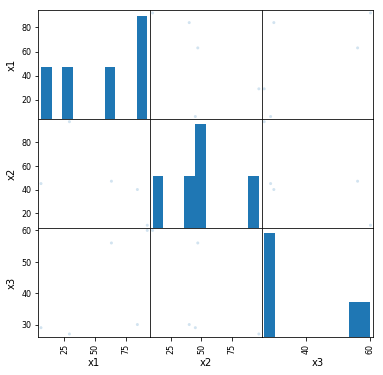

In [492]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(6, 6), diagonal='hist');

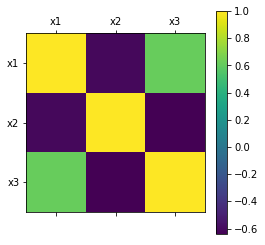

In [493]:
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.show()

## Modeling (scikit-learn)

### Data Preparation

#### Preparing Features and Dependent Value

In [494]:
feature_cols = ['X1','X2','X3']
X = mydf[feature_cols]
Y = mydf.Y

#### Splitting Data Into Training and Test Sets

In [495]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model

In [496]:
lm = LinearRegression()   # create linear regression object
lm.fit( trainX, trainY )  # train the model using training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Analyze The Model
#### Intercept

In [497]:
lm.intercept_

259.97983086538687

#### Coef

In [498]:
lm.coef_

array([ 0.11381613,  0.2008025 ,  0.2815414 ])

In [499]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','coef'] )

  features      coef
0       X1  0.113816
1       X2  0.200802
2       X3  0.281541

#### R-Squared

In [500]:
predTrain = lm.predict( trainX )

In [501]:
r2_score( trainY, predTrain )

0.93214941977404053

### Model Performance
#### Run Prediction On Train Data

In [502]:
trainPred = lm.predict( trainX )

#### Mean Absolute Error (MAE)

In [503]:
mean_absolute_error( trainY, trainPred )

4.741974639673403

#### Mean Squared Error (MSE)

In [504]:
mean_squared_error( trainY, trainPred )

29.662069564593299

#### Root Mean Squared Error (RMSE)

In [505]:
math.sqrt( mean_squared_error( trainY, trainPred ) )

5.4462895226560715

### Test Prediction

In [506]:
testPred = lm.predict( testX )

In [507]:
mean_absolute_error( testY, testPred )

5.1577186218748112

In [508]:
mean_squared_error( testY, testPred )

37.01823207145128

In [509]:
math.sqrt( mean_squared_error( testY, testPred ) )

6.084261012764926

## Modeling (statsmodel)

### Data Preparation
Splitting data into training set and testing set.

In [510]:
traindf, testdf = train_test_split(mydf, test_size=0.2)
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2)

### Create The Model - Equation Method

In [511]:
fit = smf.ols(formula='Y ~ X1 + X2 + X3', data=traindf).fit()

#### Analyze The Model

In [512]:
print (fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     793.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           3.32e-94
Time:                        21:19:09   Log-Likelihood:                -503.10
No. Observations:                 160   AIC:                             1014.
Df Residuals:                     156   BIC:                             1026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.9487      1.456    177.853      0.0

### Create The Model - Array Method
**intercept** is not included in OLS modeling by default. Hence need to use add_constant() to training dataset in order to display intercept estimate.

In [513]:
trainX = sm.add_constant(trainX)     # this add new column of all value 1
fit2 = smf.OLS(trainY, trainX).fit()

#### Analyze The Model

In [514]:
print (fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     690.0
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           8.70e-90
Time:                        21:19:09   Log-Likelihood:                -503.17
No. Observations:                 160   AIC:                             1014.
Df Residuals:                     156   BIC:                             1027.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.9068      1.514    171.650      0.0

In [515]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
2*x+1

array([  9.34044009,  15.40648987,   1.0022875 ,   7.04665145,
         3.93511782,   2.8467719 ,   4.72520423,   7.91121454,
         8.93534948,  11.77633468,   9.38389029,  14.70439001,
         5.08904499,  18.56234873,   1.54775186,  14.4093502 ,
         9.34609605,  12.17379657,   3.80773877,   4.96202978,
        17.01489137,  20.36523151,   7.26848356,  14.84645231,
        18.52778305,  18.89213327,   2.70088423,   1.78109566,
         4.39660839,  18.56285007,   2.96693668,   9.4221525 ,
        20.1577906 ,  11.6633057 ,  14.83754228,   7.31031262,
        14.73001855,  17.69251344,   1.36576555,  16.0028863 ,
        20.77722178,  15.96331309,   6.60887984,  16.78558657,
         3.06452013,   9.95787052,  19.17191006,   6.87228297,
         6.75550677,   3.60057144])

## Examples

### Example 1 - Linear Regression

#### Sample Data
Plot looks like polynomial.

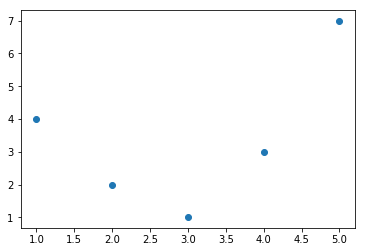

In [516]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Built The Model

**Prepare The Data**  
X needs to be at least 2D. Increase the dimension with newaxis

In [517]:
X = x[:, np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

**Fit and Predict**

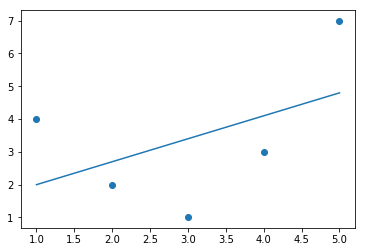

In [518]:
fit = LinearRegression().fit(X, y)
pred = fit.predict(X)
plt.scatter(x, y)
plt.plot(x,pred)

### Example 2 - Linear Regression with Polynomial Basis Functions

#### Sample Data

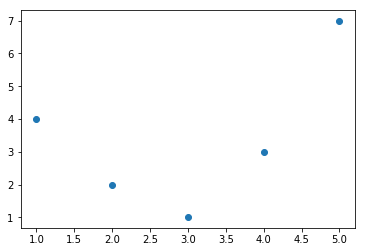

In [519]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

#### Clean Method - Use Pipeline
This method **avoid manually** creating engineered features.

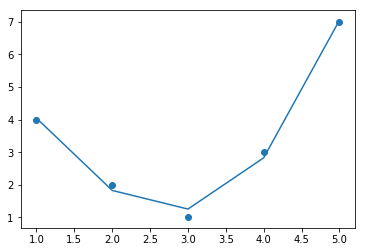

In [520]:
poly_model = make_pipeline( PolynomialFeatures(3), LinearRegression())
poly_model.fit( X,y)
pred2 = poly_model.predict(X)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

#### Alternative Method - Use Transform
This method involve create a PolynomialFeatures object, transform original data (X) with more engineered features according to degree chosen.

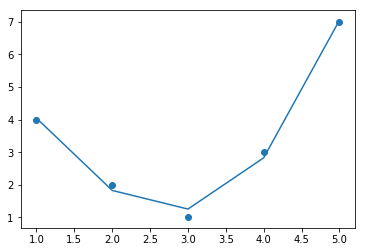

In [521]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
fit2 = LinearRegression().fit(X2, y)
pred2 = fit2.predict(X2)
## plot
plt.scatter(x, y)
plt.plot(x,pred2)

## Feature Selection

The advantage of using skcikit-learn package is that it has this particular method selection, works more or less like backward selection (not exactly), and is called **Recursive Feature**. How it works:

- Model run with all variables, weight is assigned to each variable
- Variable with smallest weight will be pruned from next iteration
- Run the model again till the number of desired features is left

### The Library

In [522]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [523]:
estimator = SVR(kernel='linear')       # we are using linear model
selector = RFE (estimator, 2, step=1)  # we want just 2 features
selector = selector.fit(X,Y)           # execute

ValueError: Found input variables with inconsistent numbers of samples: [5, 200]

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
selector.estimator_